In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


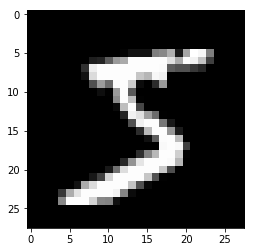

In [3]:
import matplotlib.pyplot as plt
im = plt.imshow(x_train[0], cmap='gray')
plt.show()

In [4]:
y_train[0]

5

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape)
x_train = x_train/255
x_test = x_test/25
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

(60000, 784)


In [6]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.7992 - acc: 0.8083 - val_loss: 0.9592 - val_acc: 0.9011
Epoch 2/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.3405 - acc: 0.9045 - val_loss: 0.8603 - val_acc: 0.9161
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.2855 - acc: 0.9191 - val_loss: 0.7723 - val_acc: 0.9278
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.2534 - acc: 0.9285 - val_loss: 0.7598 - val_acc: 0.9305
Epoch 5/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.2291 - acc: 0.9353 - val_loss: 0.7116 - val_acc: 0.9368


In [13]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 40us/step


In [14]:
print("loss:", score[0])
print("accu:", score[1])

loss: 0.7116279362402208
accu: 0.9368
